In [1]:
import numpy as np
import math as math
import pandas as pd
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import json
from datetime import datetime

In [5]:
df = pd.read_json('https://nepsealpha.com/trading/1/history?symbol=NEPSE&resolution=1D&from=1127260800&to=1600473600&pass=ok&currencyCode=NRS')
df

,t,c,o,h,l,v,s
0,1127347200,294.12,294.12,294.12,294.12,0,ok
1,1127606400,294.89,294.89,294.89,294.89,0,ok
2,1127692800,294.67,294.67,294.67,294.67,0,ok
3,1127779200,296.20,296.20,296.20,296.20,0,ok
4,1127865600,297.17,297.17,297.17,297.17,0,ok
...,...,...,...,...,...,...,...
3386,1599955200,1537.25,1528.15,1537.25,1522.28,3386859972,ok
3387,1600041600,1540.51,1545.68,1553.56,1538.43,3134135908,ok
3388,1600128000,1536.03,1544.71,1548.35,1531.05,1800197903,ok
3389,1600214400,1541.40,1537.35,1543.98,1530.67,1845634030,ok


In [7]:
df1 = pd.read_json('https://nepsealpha.com/trading/1/history?symbol=NEPSE&resolution=1D&from=1601164800&to=1602979200&pass=ok&currencyCode=NRS')
df1

,t,c,o,h,l,v,s
0,1601251200,1560.83,1566.44,1569.31,1557.42,1690154525,ok
1,1601337600,1553.62,1564.92,1564.92,1552.77,1829872968,ok
2,1601424000,1550.43,1561.58,1563.40,1542.57,1953636694,ok
3,1601510400,1571.04,1553.95,1572.94,1553.95,2807708137,ok
4,1601769600,1585.75,1577.77,1588.05,1577.77,3178853719,ok
5,1601856000,1582.12,1587.31,1594.89,1580.65,2578607088,ok
6,1601942400,1586.29,1588.01,1588.01,1581.75,2510585332,ok
7,1602028800,1600.97,1593.04,1602.14,1587.59,3358506296,ok
8,1602115200,1589.63,1607.52,1614.04,1586.96,2862712521,ok
9,1602374400,1576.27,1594.01,1594.36,1574.62,2395432599,ok


In [12]:
df2 = pd.read_json('https://nepsealpha.com/trading/1/history?symbol=NEPSE&resolution=1D&from=1623801600&to=1656201600&pass=ok&force=24752&currencyCode=NRS')
df2

,t,c,o,h,l,v,s
0,1602979200,1556.80,1565.90,1567.89,1554.14,1.252748e+09,ok
1,1603065600,1570.38,1556.85,1570.38,1555.46,9.546561e+08,ok
2,1603152000,1583.60,1576.62,1583.60,1573.06,1.271830e+09,ok
3,1603238400,1597.71,1591.04,1597.71,1588.78,1.633246e+09,ok
4,1603324800,1606.25,1609.11,1609.52,1596.22,1.994544e+09,ok
...,...,...,...,...,...,...,...
400,1655737140,1884.81,1934.03,1934.64,1879.69,1.750600e+09,ok
401,1655823540,1924.74,1884.25,1931.91,1877.80,1.253758e+09,ok
402,1655909940,1893.53,1925.46,1926.99,1889.70,8.437735e+08,ok
403,1655996340,1848.28,1889.40,1889.40,1835.88,1.499710e+09,ok


In [16]:
df3 = [df, df1, df2]
  
df4 = pd.concat(df3)

df4

,t,c,o,h,l,v,s
0,1127347200,294.12,294.12,294.12,294.12,0.000000e+00,ok
1,1127606400,294.89,294.89,294.89,294.89,0.000000e+00,ok
2,1127692800,294.67,294.67,294.67,294.67,0.000000e+00,ok
3,1127779200,296.20,296.20,296.20,296.20,0.000000e+00,ok
4,1127865600,297.17,297.17,297.17,297.17,0.000000e+00,ok
...,...,...,...,...,...,...,...
400,1655737140,1884.81,1934.03,1934.64,1879.69,1.750600e+09,ok
401,1655823540,1924.74,1884.25,1931.91,1877.80,1.253758e+09,ok
402,1655909940,1893.53,1925.46,1926.99,1889.70,8.437735e+08,ok
403,1655996340,1848.28,1889.40,1889.40,1835.88,1.499710e+09,ok


In [17]:
df5 = df4[['t']].astype('datetime64[s]')
df5

,t
0,2005-09-22 00:00:00
1,2005-09-25 00:00:00
2,2005-09-26 00:00:00
3,2005-09-27 00:00:00
4,2005-09-28 00:00:00
...,...
400,2022-06-20 14:59:00
401,2022-06-21 14:59:00
402,2022-06-22 14:59:00
403,2022-06-23 14:59:00


In [18]:
df4['t']=df5['t']
df4

,t,c,o,h,l,v,s
0,2005-09-22 00:00:00,294.12,294.12,294.12,294.12,0.000000e+00,ok
1,2005-09-25 00:00:00,294.89,294.89,294.89,294.89,0.000000e+00,ok
2,2005-09-26 00:00:00,294.67,294.67,294.67,294.67,0.000000e+00,ok
3,2005-09-27 00:00:00,296.20,296.20,296.20,296.20,0.000000e+00,ok
4,2005-09-28 00:00:00,297.17,297.17,297.17,297.17,0.000000e+00,ok
...,...,...,...,...,...,...,...
400,2022-06-20 14:59:00,1884.81,1934.03,1934.64,1879.69,1.750600e+09,ok
401,2022-06-21 14:59:00,1924.74,1884.25,1931.91,1877.80,1.253758e+09,ok
402,2022-06-22 14:59:00,1893.53,1925.46,1926.99,1889.70,8.437735e+08,ok
403,2022-06-23 14:59:00,1848.28,1889.40,1889.40,1835.88,1.499710e+09,ok


In [19]:
df6 = df4.set_index('t')
df6

,c,o,h,l,v,s
t,,,,,,
2005-09-22 00:00:00,294.12,294.12,294.12,294.12,0.000000e+00,ok
2005-09-25 00:00:00,294.89,294.89,294.89,294.89,0.000000e+00,ok
2005-09-26 00:00:00,294.67,294.67,294.67,294.67,0.000000e+00,ok
2005-09-27 00:00:00,296.20,296.20,296.20,296.20,0.000000e+00,ok
2005-09-28 00:00:00,297.17,297.17,297.17,297.17,0.000000e+00,ok
...,...,...,...,...,...,...
2022-06-20 14:59:00,1884.81,1934.03,1934.64,1879.69,1.750600e+09,ok
2022-06-21 14:59:00,1924.74,1884.25,1931.91,1877.80,1.253758e+09,ok
2022-06-22 14:59:00,1893.53,1925.46,1926.99,1889.70,8.437735e+08,ok


In [20]:
df7=df6[['c']]
df7

,c
t,
2005-09-22 00:00:00,294.12
2005-09-25 00:00:00,294.89
2005-09-26 00:00:00,294.67
2005-09-27 00:00:00,296.20
2005-09-28 00:00:00,297.17
...,...
2022-06-20 14:59:00,1884.81
2022-06-21 14:59:00,1924.74
2022-06-22 14:59:00,1893.53


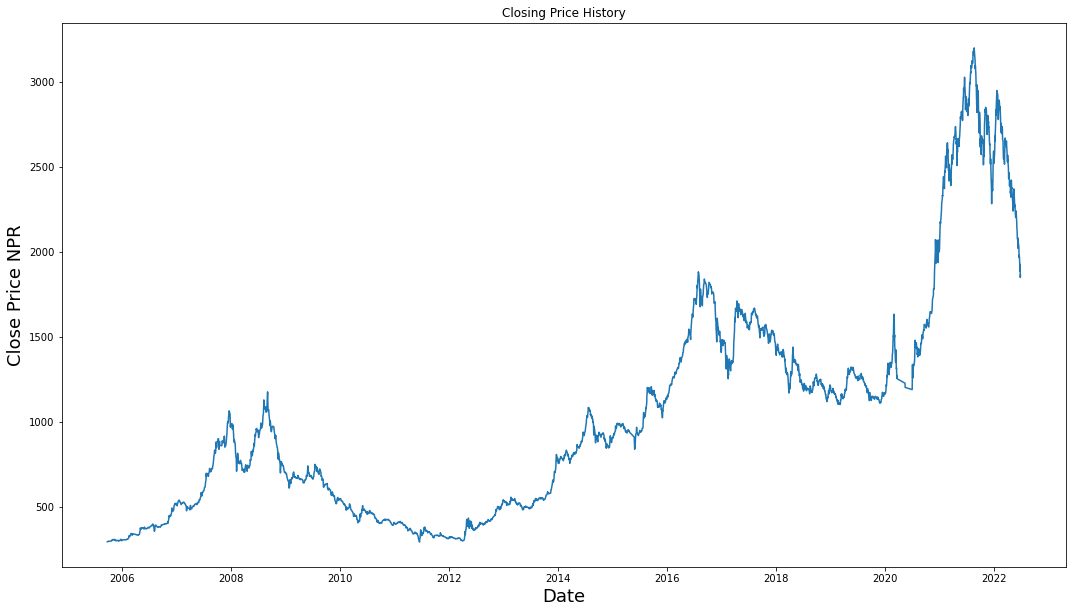

In [21]:
plt.figure(figsize=(18,10))
plt.title('Closing Price History')
plt.plot(df7['c'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price NPR', fontsize=18)
plt.show()

In [22]:
data = df7.filter(['c'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .7 )
training_data_len

2667

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00072948],
       [0.00099443],
       [0.00091873],
       ...,
       [0.55107546],
       [0.53550525],
       [0.54024685]])

In [27]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []
for i in range(1000, len(train_data)):
    x_train.append(train_data[i-1000:i, 0])
    y_train.append(train_data[i, 0])
    if i<=1001:
        print(x_train)
        print(y_train)
        print()

[array([0.00072948, 0.00099443, 0.00091873, 0.00144519, 0.00177896,
       0.00171358, 0.00150369, 0.00156562, 0.00171358, 0.00183746,
       0.00218499, 0.00372653, 0.00503408, 0.00458332, 0.00446977,
       0.0047244 , 0.00535753, 0.00410847, 0.00549861, 0.00486892,
       0.00357513, 0.00295232, 0.00297296, 0.00294888, 0.00344781,
       0.00352007, 0.00302114, 0.00316566, 0.00314157, 0.00332738,
       0.00308307, 0.00293856, 0.00335835, 0.0033205 , 0.00343061,
       0.00206456, 0.00188907, 0.00244306, 0.00269769, 0.00265296,
       0.00299705, 0.00352351, 0.00382632, 0.00412224, 0.00446289,
       0.00502032, 0.00555022, 0.00573603, 0.00292135, 0.00272866,
       0.00312781, 0.00330329, 0.00370932, 0.00387449, 0.00418417,
       0.00461773, 0.00476569, 0.00468655, 0.00462461, 0.00466246,
       0.00464526, 0.00470031, 0.00476569, 0.00479322, 0.0048758 ,
       0.00456612, 0.00457644, 0.00472096, 0.0046487 , 0.00486204,
       0.00491365, 0.00512699, 0.00586335, 0.00559151, 0.0058

In [28]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1667, 1000, 1)

In [30]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1667/1667 [==============================] - 559s 332ms/step - loss: 5.5518e-04


In [33]:
test_data = scaled_data[training_data_len - 1000: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(1000, len(test_data)):
    x_test.append(test_data[i-1000:i, 0])

In [34]:
x_test = np.array(x_test)

In [35]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

36/36 [==============================] - 17s 420ms/step


In [37]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

74.49539637961927

<ipython-input-38-b45041c00a1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


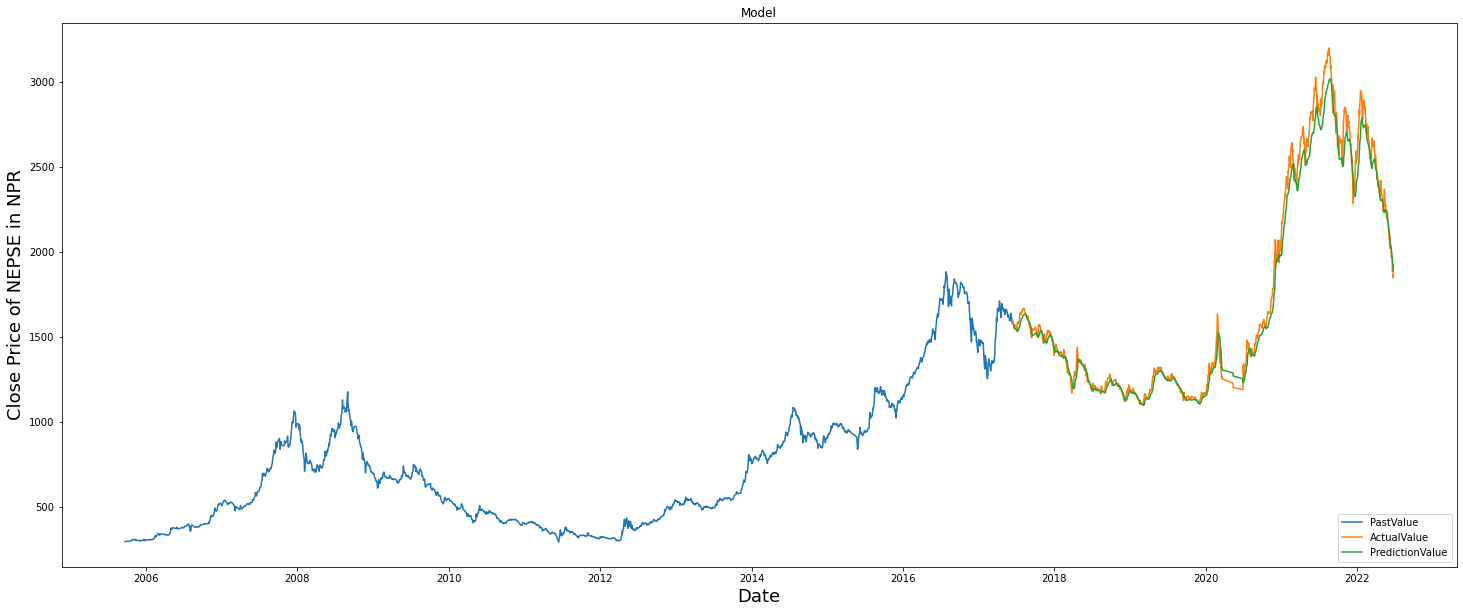

In [38]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure (figsize = (25,10))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price of NEPSE in NPR', fontsize=18)
plt.plot(train['c'])
plt.plot(valid[['c','Predictions']])
plt.legend(['PastValue', 'ActualValue', 'PredictionValue'], loc = 'lower right')
plt.show()

In [39]:
new_df = df7.filter(['c'])
last_1000_days = new_df[-1000:].values
last_1000_days_scaled = scaler.transform(last_1000_days)
X_test = []
X_test.append(last_1000_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 137ms/step
[[1869.9811]]


In [40]:
df8 = df7.tail(1)
df8

,c
t,
2022-06-24 12:59:00,1862.06


In [41]:
df9 = df8.assign(Prediction_of_close_price_for_next_day=pred_price)
df9

,c,Prediction_of_close_price_for_next_day
t,,
2022-06-24 12:59:00,1862.06,1869.981079


In [42]:
df10 = df9.rename(columns = {'c':"Today's_close_price"})
df10

,Today's_close_price,Prediction_of_close_price_for_next_day
t,,
2022-06-24 12:59:00,1862.06,1869.981079
